<a href="https://colab.research.google.com/github/Mohit03singh/Global-Terrorism-Database-Analysis/blob/main/GLOBAL_TERRIORST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Global Terrorism Database project**

##### **Project Type**    - EDA/Global Terrorism Database project
##### **Contribution**    - Team
##### **Team Member 1 -MOHIT**
##### **Team Member 2 -TILAK  R**
##### **Team Member 3 - SOHIL SINGHANIA**
##### **Team Member 4 -NAIVAIDYA TRIPATHI**

# **Project Summary -**

<h1> <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</h1>



**Geography**: All across the globe

**Time** **period**: 1970-2017,

**Units** **of** **analysis**: Attack, Years, Region, Cities, Property etc..

**Variables**: >100 variables on location, tactics, perpetrators, targets, and outcomes

<b> Explore and analyze the data to discover key findings pertaining to terrorist activities.

### The main objective of this project is to analyse few key findings such as :

### 1. Lets See Which Year was the most peacefull and which was the most violent year and general trends of attacks through out the year
### 2. Casualties over the year
### 3.COUNTRIES BASED ON SAFETY
### 4.Pie plot to check relationship between successfull and unsuccessful


# **DATA** **WRANGLING** **AND** **CLEANING**

In [6]:
# importing libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

working_dir_path = '/content/Global Terrorism Data.csv'

df = pd.read_csv(working_dir_path ,encoding="ISO-8859-1")

<ipython-input-7-dbbcc8edceda>:3: DtypeWarning: Columns (4,6,31,33,59,60,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(working_dir_path ,encoding="ISO-8859-1")


In [8]:
dataset = df.copy()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.head()
# checking first 5 rows to get the general overview of data frame

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


#<h1>   <b> Lets first understand and get the idea about all major variables that we used in the our csv file  </h1>


There are 135 variables in Dataset after the first glance of Dataset found that most of the variables has hight number of NaN values. Each observation is belong the a particular attack and below is description of variables by which details of attack is captured.

<u> iYear</u> - year when the attack happen

<u>imonth</u>- month in which the attack happen

<u>iDay</u>- Day of the month in which the attack happen

<u>region</u> - Region where attack happen

<u>country_txt</u> - Name of the country where atttack happen

<u>city</u>- Name of the city of the country

<u>attacktype</u>= Type of Attack(ie. Assassination,Bombing/Explosion.....)

<u>target_type</u>- Type of a target(ie.Private Citizens & Property,Government (Diplomatic)......)

<u>group</u>- Name of the terrorist group who takes attackes responsibility .

<u>weapon_type</u>- Type of the weapon used

<u>killed</u>- Numeber of people killed in attack

<u>wounded</u>- Number of people injured in Attack

In [10]:
#checking how many total coloums and rows present in Data Frame it will show like(tota_rows,total_columns)
df.shape

(110667, 135)

In [11]:
#get the details of attiributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110667 entries, 0 to 110666
Columns: 135 entries, eventid to related
dtypes: float64(58), int64(19), object(58)
memory usage: 114.0+ MB


In [12]:
#get the details of columns(Variables)
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
# Checking how many variables has more than 70% NaN values and store the name of columns in the list columns_with_NaN
columns_with_NaN = [i for i in df.columns if df[i].isna().sum()*100/len(df)>70]

In [14]:
columns_with_NaN

['approxdate',
 'resolution',
 'location',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propvalue',
 'propcomment',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus'

In [15]:
 #Now dropping all the columns with more than 70% NaN values from data frame (axis=1 for column)
df.drop(columns_with_NaN,inplace=True,axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110667 entries, 0 to 110666
Data columns (total 62 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           110667 non-null  int64  
 1   iyear             110667 non-null  int64  
 2   imonth            110667 non-null  int64  
 3   iday              110667 non-null  int64  
 4   extended          110667 non-null  int64  
 5   country           110667 non-null  int64  
 6   country_txt       110667 non-null  object 
 7   region            110667 non-null  int64  
 8   region_txt        110667 non-null  object 
 9   provstate         110248 non-null  object 
 10  city              110233 non-null  object 
 11  latitude          106554 non-null  float64
 12  longitude         106553 non-null  float64
 13  specificity       110661 non-null  float64
 14  vicinity          110667 non-null  int64  
 15  summary           44538 non-null   object 
 16  crit1             11

In [17]:
# Now change variable name into meaningful variable for better understanding
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region',
                       'attacktype1_txt':'AttackType','targtype1_txt':'Target','nkill':'fatalities','nwound':'injuries',
                       'summary':'Summary','gname':'Group','weaptype1_txt':'Weapon'},inplace=True)

In [18]:
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'Country',
       'region', 'Region', 'state', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'Summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'AttackType', 'targtype1', 'Target', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'Group', 'motive',
       'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'Weapon', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'fatalities', 'nkillus', 'nkillter', 'injuries', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'propextent_txt', 'ishostkid', 'ransom',
       'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [19]:
df['Casualities'] = df['fatalities']+ df['injuries']

In [20]:
df_most_selected = df[['Year','Month','Day','Country','state','Region','AttackType','Target','fatalities','injuries','success','Summary','Group','Weapon','Casualities','city','longitude','latitude']]


In [21]:
df_most_selected.info()
# Selcting the variables on which analysis will be performed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110667 entries, 0 to 110666
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         110667 non-null  int64  
 1   Month        110667 non-null  int64  
 2   Day          110667 non-null  int64  
 3   Country      110667 non-null  object 
 4   state        110248 non-null  object 
 5   Region       110667 non-null  object 
 6   AttackType   110667 non-null  object 
 7   Target       110667 non-null  object 
 8   fatalities   103998 non-null  float64
 9   injuries     100514 non-null  float64
 10  success      110667 non-null  int64  
 11  Summary      44538 non-null   object 
 12  Group        110667 non-null  object 
 13  Weapon       110667 non-null  object 
 14  Casualities  100202 non-null  float64
 15  city         110233 non-null  object 
 16  longitude    106553 non-null  float64
 17  latitude     106554 non-null  float64
dtypes: float64(5), int64(4),

In [22]:
# checking statits paramenter on continious variables of data frame
df_most_selected.describe()

,Year,Month,Day,fatalities,injuries,success,Casualities,longitude,latitude
count,110667.000000,110667.000000,110667.000000,103998.000000,100514.000000,110667.000000,100202.000000,1.065530e+05,106554.000000
mean,1994.827808,6.393695,15.325409,2.314439,3.271325,0.917265,5.438265,-7.967105e+02,21.630939
std,11.457060,3.362394,8.820364,11.266433,45.040897,0.275482,52.223501,2.640301e+05,21.209339
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.618590e+07,-53.154613
25%,1986.000000,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,-7.050530e+01,7.667600
50%,1994.000000,6.000000,15.000000,0.000000,0.000000,1.000000,1.000000,2.924286e+01,28.518663
75%,2007.000000,9.000000,23.000000,2.000000,1.000000,1.000000,4.000000,6.714331e+01,36.133333
max,2012.000000,12.000000,31.000000,1384.000000,8191.000000,1.000000,9574.000000,1.793667e+02,74.633553


inference- as we can infer from above table most number of fatalities were 1570 and most number of injuries were 8191 throuout the data for a single incident and max in the year of 2017.

In [23]:
#creating custom  function of redundent task thet we will be doing throughout the Analysis

# custom funtion to create count plot
def makeCountPlot(df,col,x_label=None,y_label=None,title=None,palette=None,hue=None):
  if df[col].value_counts().shape[0]<10:
    plt.figure(figsize=(12,6),dpi=100)
    sns.countplot(data=df,x=col,palette=palette,hue=hue,order=df[col].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);
  else:
    plt.figure(figsize=(25,7),dpi=500)
    sns.countplot(data=df,x=col,palette=palette,hue=hue,order=df[col].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);

# Custom funtion to create Bar plot
def makeBarPlot(df,col1,col2,x_label=None,y_label=None,title=None,palette=None,hue=None):
  if df[col1].value_counts().shape[0]<10:
    plt.figure(figsize=(12,6),dpi=100)
    sns.barplot(data=df,x=col1,y=col2,palette=palette,hue=hue,order=df[col1].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);
  else:
    plt.figure(figsize=(25,7),dpi=500)
    sns.barplot(data=df,x=col1,y=col2,palette=palette,hue=hue,order=df[col1].value_counts().index)
    plt.xlabel(x_label,fontweight='bold')
    plt.ylabel(y_label,fontweight='bold')
    plt.title(title, fontweight='bold',fontsize=17);

#Custom funtion to create Scatter plot
def makeScatterPlot(df,col1,col2,hue=None):
  sns.scatterplot(data=df,x=col1,y=col2,hue=hue,palette='Dark2',s=100,style=hue)
  plt.figure(figsize=(12,4),dpi=100)

<h1>1. Lets See Which Year was the most peacefull and which was the most violent year and general trends of attacks through out the year</h1>

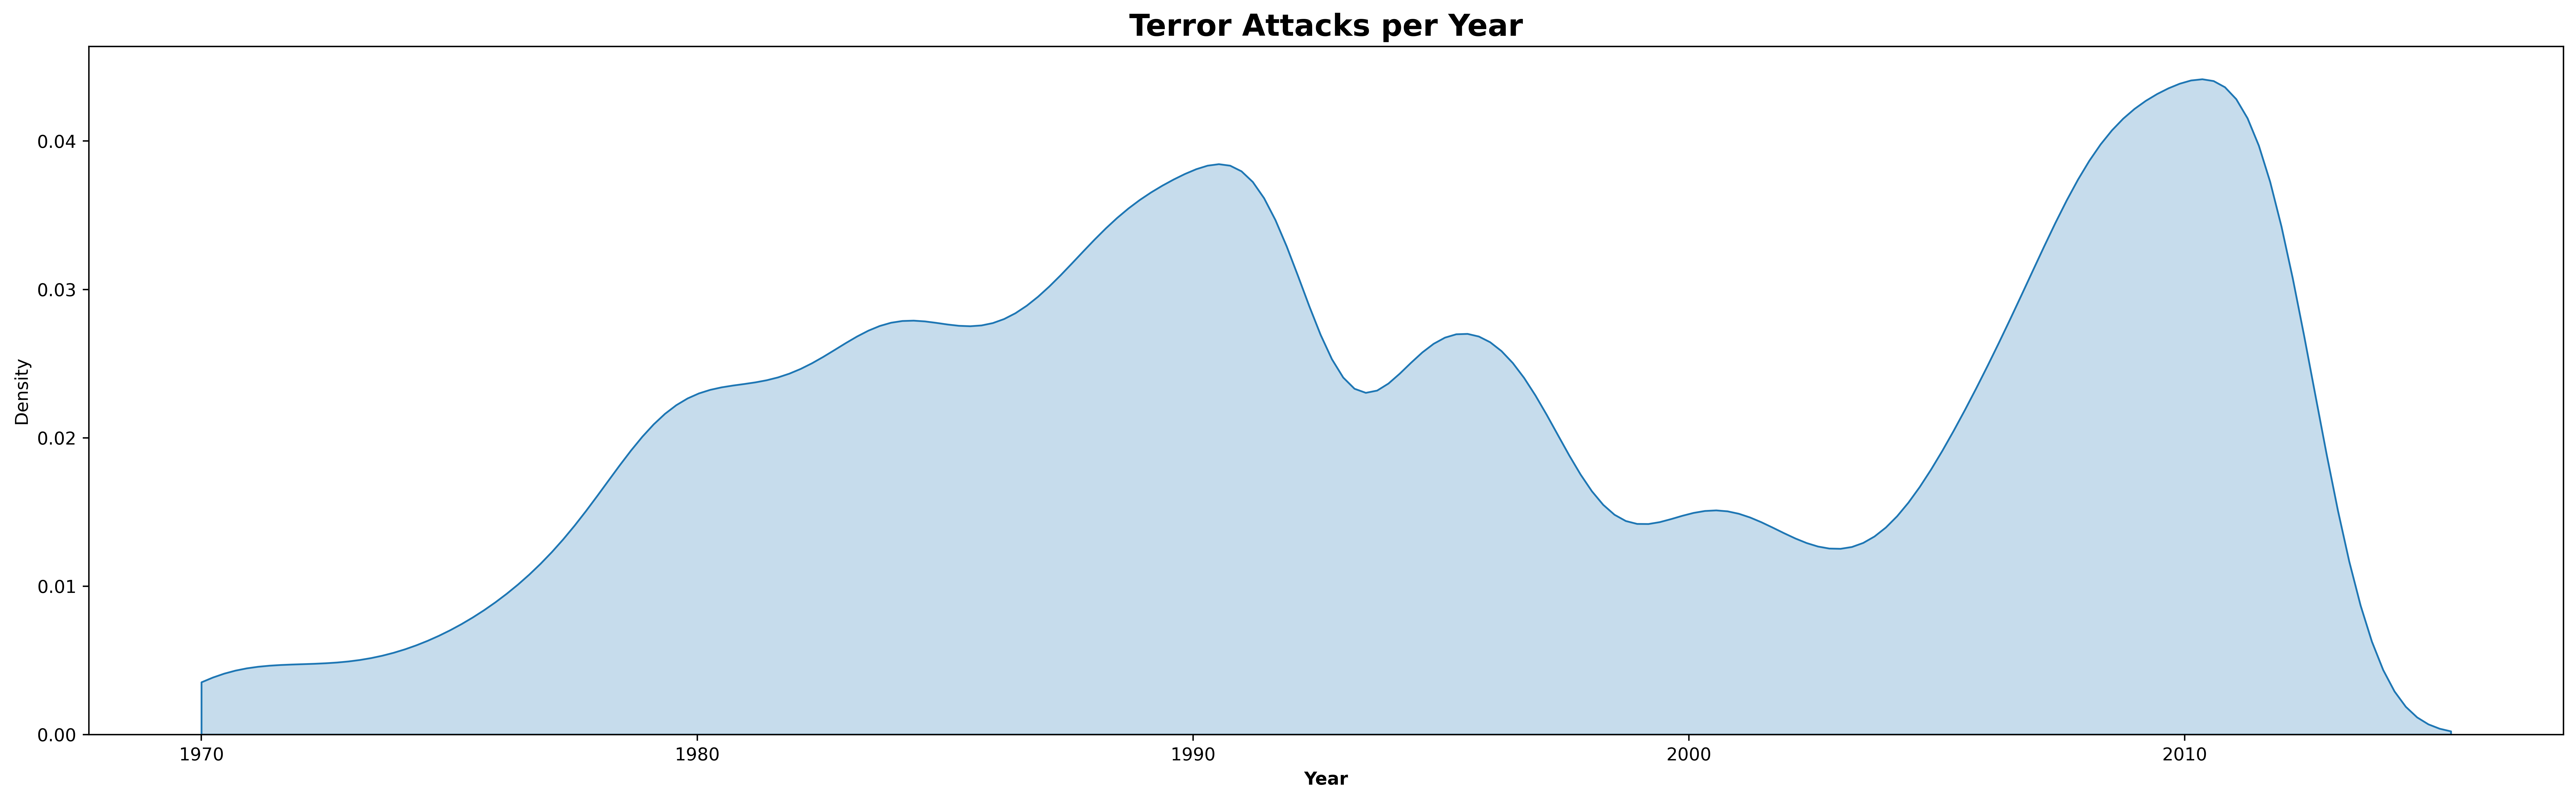

In [24]:
#creating kde plot to get the flow of the data based on year--to get the idea when it was going down and when it was going up
plt.figure(figsize=(25,7),dpi=500)
sns.kdeplot(data=df_most_selected,x='Year',clip=[1970,2017],fill=True)
plt.xlabel('Year',fontweight='bold')
plt.title('Terror Attacks per Year', fontweight='bold',fontsize=17);

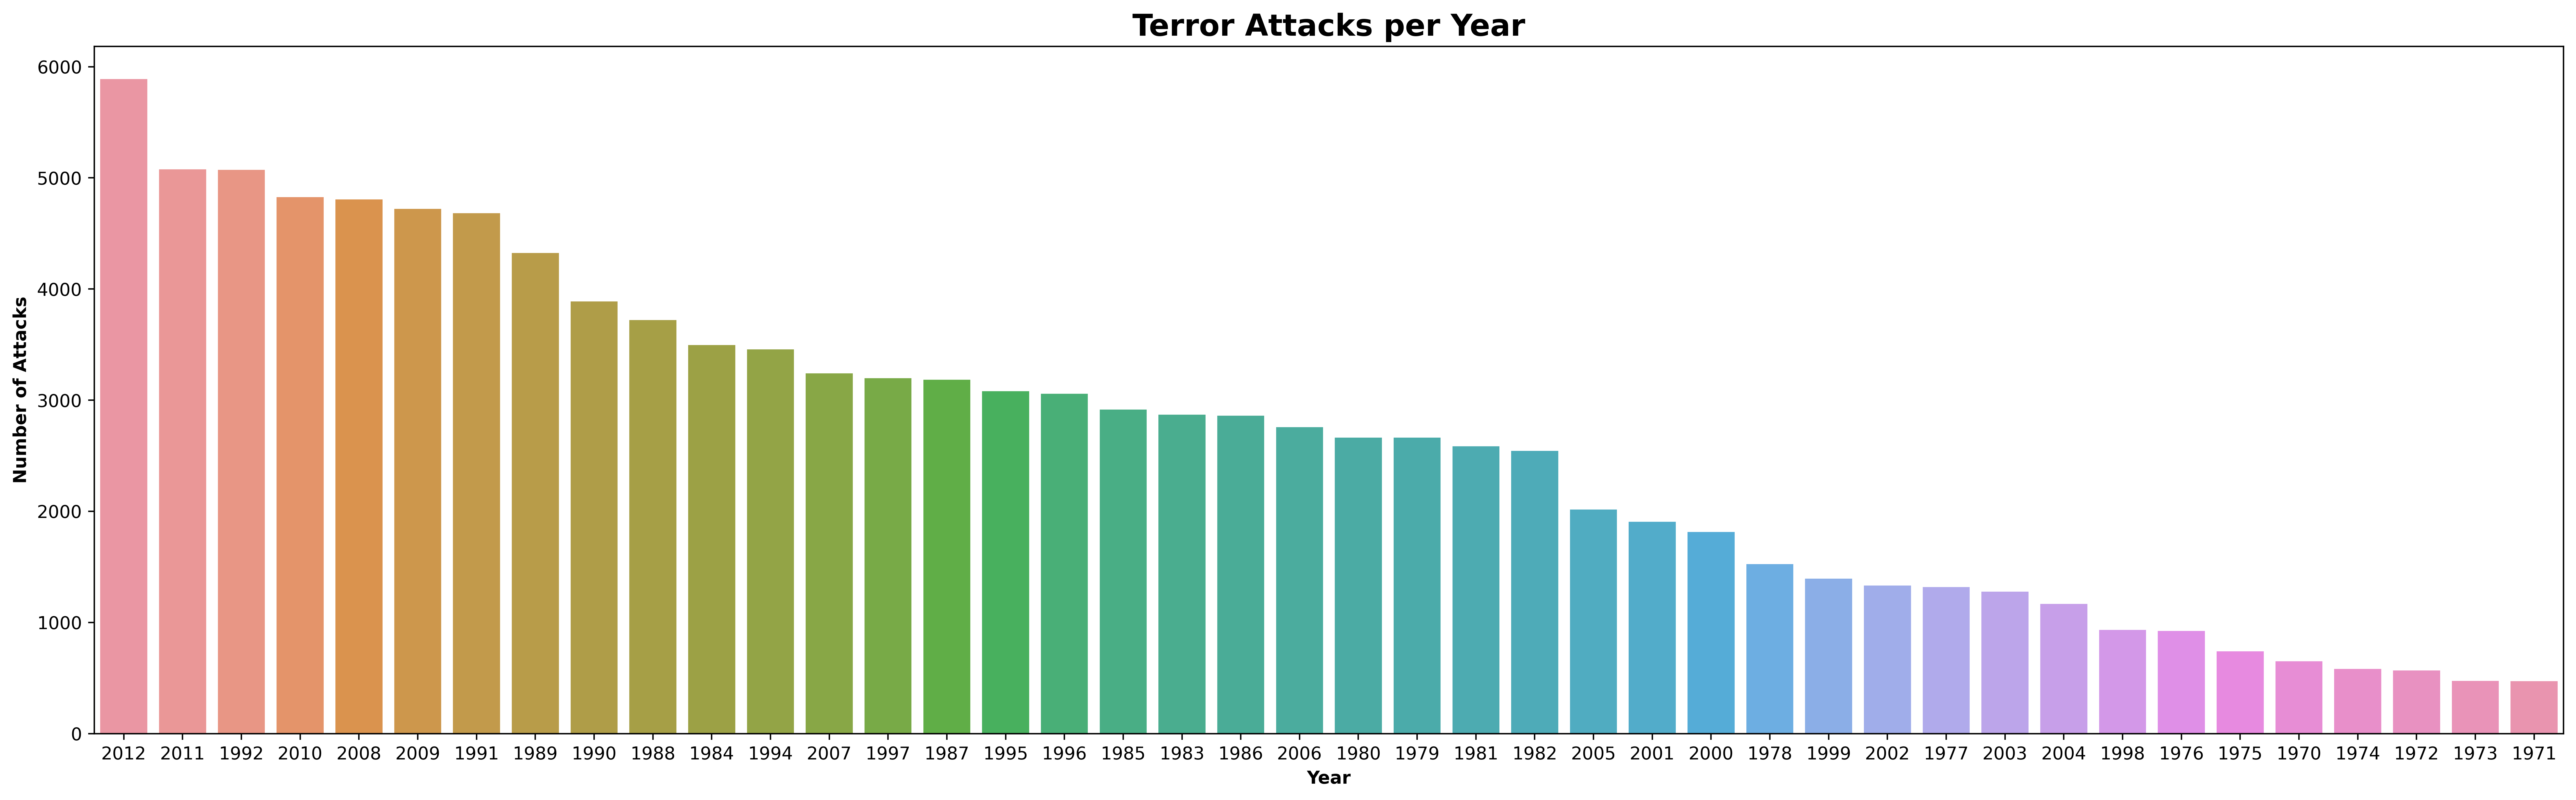

In [25]:
# creating the Count plot based on years ---using custom function
makeCountPlot(df_most_selected,'Year',x_label='Year',y_label='Number of Attacks',title='Terror Attacks per Year',palette=None)


Inference-- As we can see in the above two graphs terrorist activities were moderately increasing from 1971 till 1992 and after that there was a slight declince in the attacks for some time and after the year 2003-04 terrorist activities increased sharply. year 2014 is most violent and year 1971 was least violent as per the data.

# **2 . Casualties over the year**

In [26]:
Casualties = df_most_selected[["Year","Casualities"]].groupby('Year').sum()

In [27]:
Casualties

,Casualities
Year,
1970,367.0
1971,119.0
1972,602.0
1973,621.0
1974,1122.0
1975,781.0
1976,1158.0
1977,874.0
1978,2664.0


In [28]:
Casualties.sum()

Casualities    544925.0
dtype: float64

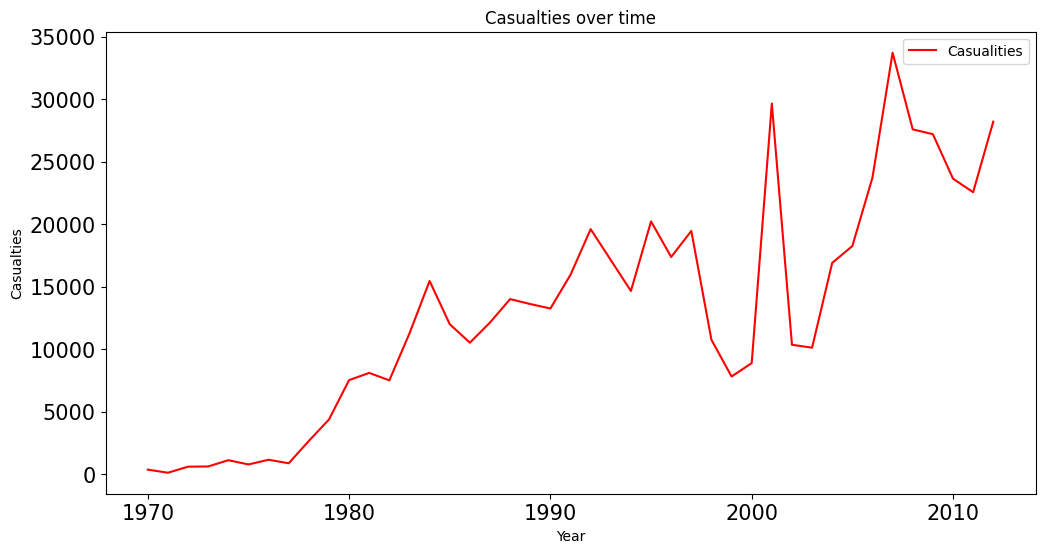

In [29]:
# now lets plot casualties over the plot
Casualties.plot(kind = "line",color = "red", figsize = (12,6), fontsize = 15)
plt.title("Casualties over time")
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.show()

**INFERENCE** : "We can see from the figure that the trend is **increasing sharply from 2000's and reached its peak at 2016 and it was** low at 1970's" and the number of people **killed** and **wounded** is **872892.0** .

## **3.COUNTRIES BASED ON SAFETY**

In [30]:
df_most_selected['safety']=df_most_selected.apply((lambda x: 'Least_vulnearble' if x['Casualities']<=10 else 'Moderately_vulnearble' if x['Casualities']>=10 else 'Highly_vulnearble' if  x['Casualities']>=100   else 'Undefined' ),axis=1)
df_most_selected.head(100)

<ipython-input-30-b5ef6a7a0dc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_selected['safety']=df_most_selected.apply((lambda x: 'Least_vulnearble' if x['Casualities']<=10 else 'Moderately_vulnearble' if x['Casualities']>=10 else 'Highly_vulnearble' if  x['Casualities']>=100   else 'Undefined' ),axis=1)


,Year,Month,Day,Country,state,Region,AttackType,Target,fatalities,injuries,success,Summary,Group,Weapon,Casualities,city,longitude,latitude,safety
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,1,NaN,MANO-D,Unknown,1.0,Santo Domingo,-69.951164,18.456792,Least_vulnearble
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,1,NaN,23rd of September Communist League,Unknown,0.0,Mexico city,-99.086624,19.371887,Least_vulnearble
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,1,NaN,Unknown,Unknown,1.0,Unknown,120.599741,15.478598,Least_vulnearble
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Explosives,NaN,Athens,23.762728,37.997490,Undefined
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Incendiary,NaN,Fukouka,130.396361,33.580412,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1970,2,28,Jordan,Khalil,Middle East & North Africa,Armed Assault,Tourists,NaN,NaN,1,NaN,Unknown,Firearms,NaN,Hebron,35.094162,31.530243,Undefined
96,1970,3,0,Philippines,Metropolitian Manila,Southeast Asia,Bombing/Explosion,Government (Diplomatic),0.0,0.0,1,NaN,Unknown,Explosives,0.0,Manila,120.978666,14.596051,Least_vulnearble
97,1970,3,1,Italy,Lazio,Western Europe,Bombing/Explosion,Airports & Aircraft,0.0,0.0,0,NaN,Eritrean Liberation Front,Explosives,0.0,Rome,12.490069,41.890961,Least_vulnearble
98,1970,3,1,United States,Colorado,North America,Bombing/Explosion,Military,0.0,0.0,1,3/1/1970: Unknown perpetrators bombed the offi...,Student Radicals,Explosives,0.0,Boulder,-105.265942,40.007581,Least_vulnearble


In [31]:
new_safety = df_most_selected.head(10000)

In [32]:
df_most_selected

,Year,Month,Day,Country,state,Region,AttackType,Target,fatalities,injuries,success,Summary,Group,Weapon,Casualities,city,longitude,latitude,safety
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,1,NaN,MANO-D,Unknown,1.0,Santo Domingo,-69.951164,18.456792,Least_vulnearble
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,1,NaN,23rd of September Communist League,Unknown,0.0,Mexico city,-99.086624,19.371887,Least_vulnearble
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,1,NaN,Unknown,Unknown,1.0,Unknown,120.599741,15.478598,Least_vulnearble
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Explosives,NaN,Athens,23.762728,37.997490,Undefined
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,1,NaN,Unknown,Incendiary,NaN,Fukouka,130.396361,33.580412,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110662,2012,9,3,Turkey,Hakkari,Middle East & North Africa,Hostage Taking (Kidnapping),Government (General),0.0,0.0,1,09/03/2012: Assailants abducted Mecit Tarhan i...,Kurdistan Workers' Party (PKK),Unknown,0.0,Oul,43.744984,37.445932,Least_vulnearble
110663,2012,9,3,Afghanistan,Kapisa,South Asia,Assassination,Government (General),8.0,0.0,0,09/03/2012: Gunmen attacked the convoy of Mehr...,Taliban,Firearms,8.0,Tagab district,69.649444,34.855556,Least_vulnearble
110664,2012,9,3,Pakistan,Federally Administered Tribal Areas,South Asia,Bombing/Explosion,Unknown,0.0,0.0,0,09/03/2012: Four roadside bombs were discovere...,Unknown,Explosives,0.0,Miran Shah,70.068253,33.006516,Least_vulnearble
110665,2012,9,2,Pakistan,Federally Administered Tribal Areas,South Asia,Bombing/Explosion,Private Citizens & Property,0.0,2.0,1,09/02/2012: An explosive device detonated alon...,Unknown,Explosives,2.0,Mangal Bagh Kandao,70.676944,33.812500,Least_vulnearble


Inferemce : we can observe from the graph that the **american, middle east and africana continents** are **highly succeptible** to terrorist attacks followed **by south asian countries**

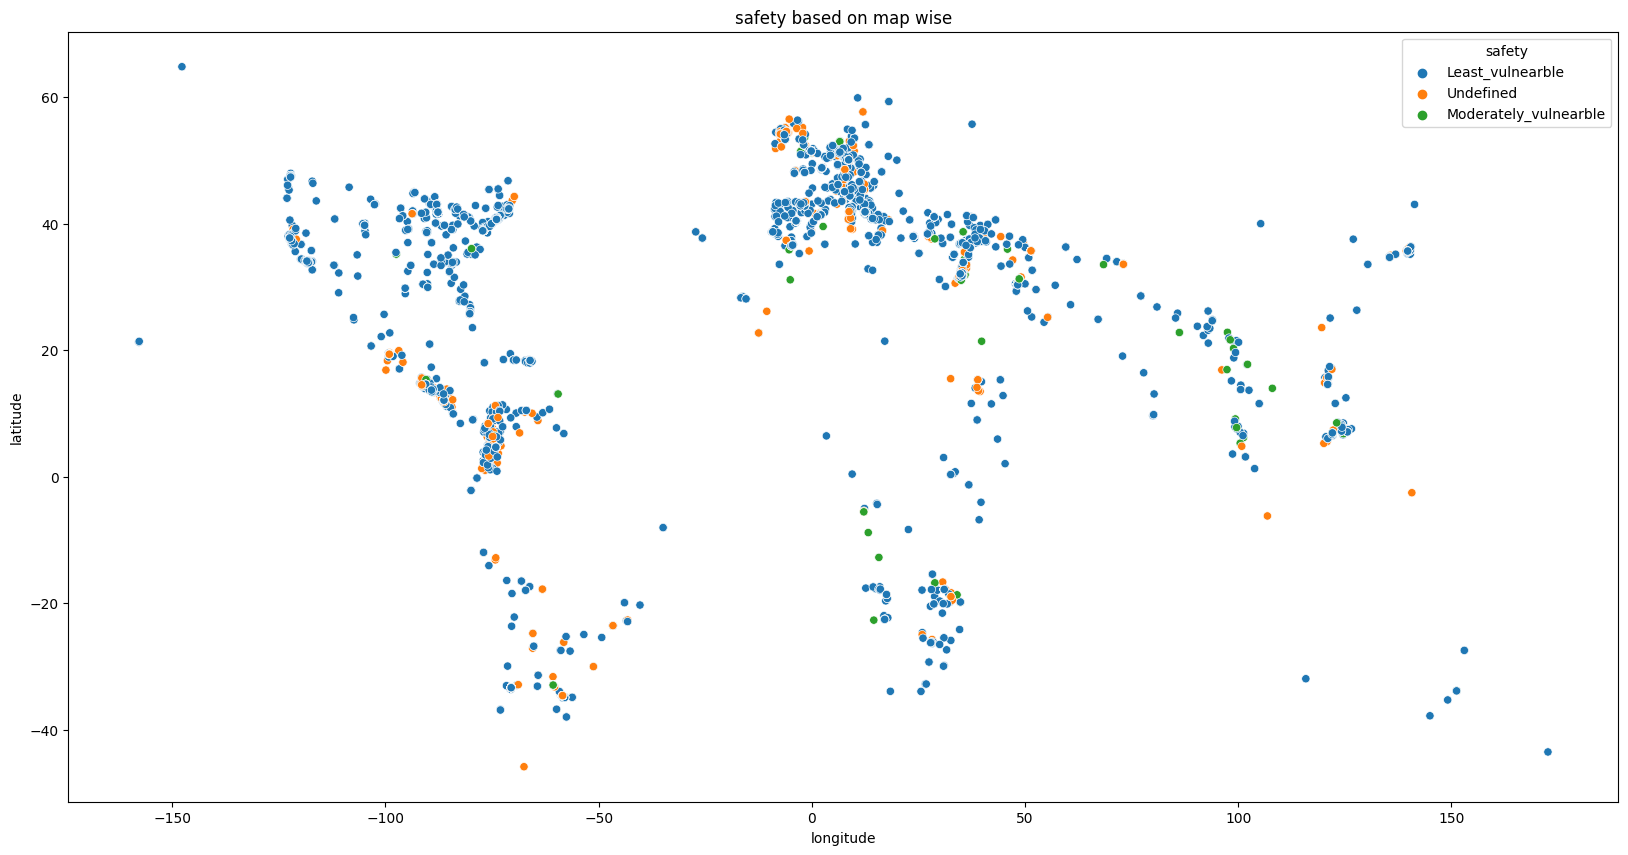

In [33]:
plt.figure(figsize=(20,10))
ax_5 = sns.scatterplot( x = new_safety['longitude'],y =new_safety['latitude'],hue=new_safety['safety'])
ax_5.set_title('safety based on map wise')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()


## **4.Pie plot to check relationship between successfull and unsuccessful**

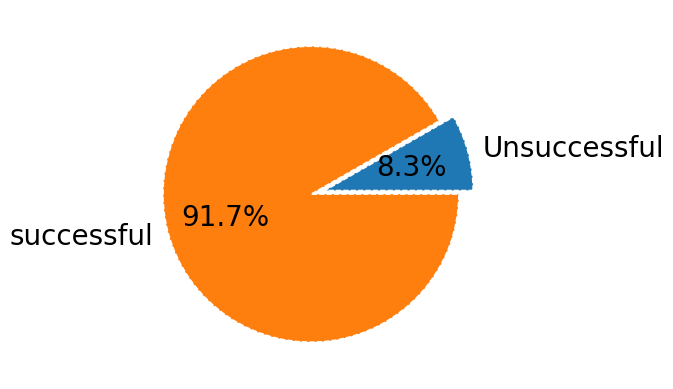

In [34]:
#Creating a Pie plot to check relationship between successfull and unsuccessful
win = df_most_selected.groupby(['success'])['success'].count()
win_list = win.values.tolist()
keys = ['Unsuccessful', 'successful']
palette_color = sns.color_palette('dark')
explode = [0.1, 0]
plt.pie(win_list, labels=keys,explode=explode, autopct='%1.1f%%',wedgeprops={"edgecolor":"1",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True},textprops={'fontsize':20});

Inference- 89% of total attempts are successfull and 11% unsuccessful.

### **5.CREATING NEW DATA FRAME OF 10 MOST AFFECTED COUNTIRES IN TERM OF ATTACKS**

In [35]:
# creating new Data Frame of 10 most affected countries in term of Attacks

most_attacked_countries = df_most_selected['Country'].value_counts()
ten_most_affected_countries = most_attacked_countries.sort_values(ascending=False).head(10)

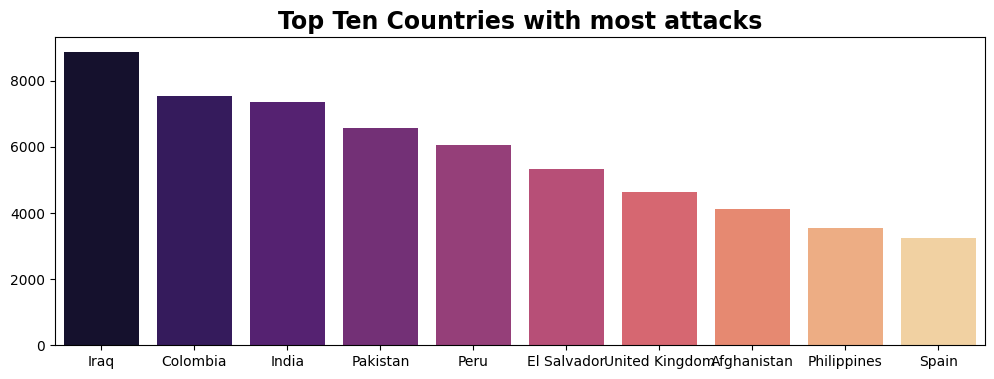

In [36]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=ten_most_affected_countries.index,y=ten_most_affected_countries.values,palette='magma')
plt.title('Top Ten Countries with most attacks', fontweight='bold',fontsize=17);

Inference- <u> <b> Iraq </u> is most attacked country was terrorist followed by<u> <b>  Pakistan </u> and <b> Afghanistan <u> <b> Afghanistan </u> and in<u> <b> india </u> india is nearly around  13k attack .

## **6. REGIONWISE ATTACKS**

In [37]:
REGION = pd.crosstab(df.Year,df.Region)

In [38]:
REGION.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


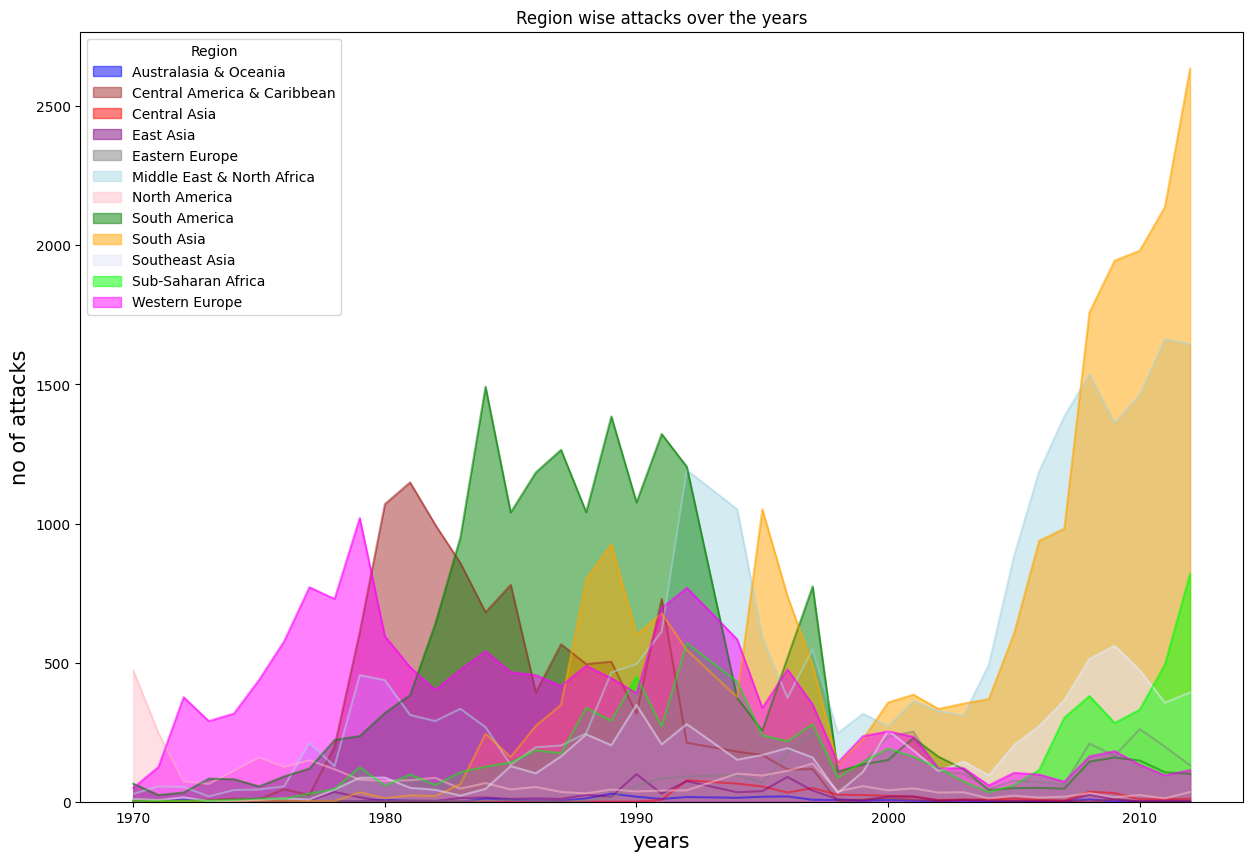

In [39]:
color_set = ["blue","brown","red","purple","gray","lightblue","pink","green","orange","lavender","lime","magenta"]
REGION.plot(kind = "area" ,stacked = False, color = color_set ,alpha = 0.5,  figsize = (15,10) )
plt.title("Region wise attacks over the years")
plt.xlabel("years", fontsize = 15)
plt.ylabel("no of attacks", fontsize = 15)
plt.show()

Inference : It is evident from the figure that the **Middle eastern region** and N**orth African regions** are **highly vulnerable to terrorist attacks** **followed by South Asia**

## ***7. TOTAL TERRORIST ATTACKS IN EACH REGION FROM 1971 - 2017***

In [40]:
TOT = REGION.transpose()
TOT["Total"] = TOT.sum(axis=1)
act = TOT["Total"].sort_values(ascending = False)